In [0]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 27.8 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [0]:
import spacy
from spacy import displacy
from spacy import tokenizer
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
import transformers
from transformers import pipeline
import requests
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO
import torch
from diffusers import StableDiffusionPipeline
from transformers import AutoModelForCausalLM, AutoTokenizer
import urllib.request
import cv2
import numpy as np
import io
import base64
import time
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Sentiment Analysis

In [0]:
en_stopwords = stopwords.words("english")

In [0]:
def pre_processing_text(input_text):
    lower_text = input_text.lower()
    no_punct_text = re.sub(r"[^\w\s]", "", lower_text)
    # stopwords_removed_text = ' '.join([word for word in no_punct_text.split() if word not in en_stopwords])
    return no_punct_text

In [0]:
def analyze_sentiments(text):
    # model_name = "tabularisai/multilingual-sentiment-analysis"
    model_name = "distilbert-base-uncased-finetuned-sst-2-english"
    sentiment_analysis = pipeline("sentiment-analysis", model=model_name)
    pre_processed_text = pre_processing_text(text)
    sentiment_analyis_output = sentiment_analysis(pre_processed_text)
    print(f"The sentiment of the text from the user prompt is : {sentiment_analyis_output[0]['label']}")
    print(f"The sentiment score of the text from the user prompt is : {sentiment_analyis_output[0]['score']}")
    return sentiment_analyis_output

#Generating Name Entities

In [0]:
def generate_named_entities(input_text):
    nlp = spacy.load("en_core_web_sm")
    pre_processed_text = pre_processing_text(input_text)
    spacy_doc = nlp(pre_processed_text)
    try:
        print(f"The named entities in the text are : ")
        for word in spacy_doc.ents:
            print(word.text, word.label_)

        print(f"The named entities in the text are visualized below")
        displacy.render(spacy_doc, style='ent', jupyter=True)
    except Exception as e:
        print(f"There are no named entities in the text")

    return spacy_doc

#Text Translation

In [0]:
# Translation function
def translate_text(text, target_language="spanish"):
    """Translates text from English to the target language (default is Spanish)."""
    from googletrans import Translator
    translator = Translator()
    translation = translator.translate(text, dest=target_language)
    return translation.text

#Image Generation

In [0]:
# Generate an image from text
def generate_image(user_prompt):
    try:
        pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")
        pipe = pipe.to("cuda" if torch.cuda.is_available() else "cpu")
        system_prompt = "Generate a high quality realistic image of the following:"
        prompt = system_prompt + " " + user_prompt
        generated_image = pipe(prompt).images[0]
        return generated_image
    except Exception as e:
        return f"Error generating image: {e}"

#Caption Generation

In [0]:
# Load the image-to-text model
def load_model(model_name):
    if model_name == "":
        return pipeline("image-to-text")
    else:
        return pipeline("image-to-text", model=model_name)

# # Generate captions for an image from a URL
def generate_captions(img, model_name, num_captions=1):
    try:
        # Load the image captioning model
        captioning_model = load_model(model_name)
        
        #captions = []
        for _ in range(num_captions):
            caption = captioning_model(img)
            #captions.append(caption[0]["generated_text"])
        
        return caption[0]["generated_text"]
    except Exception as e:
        return [f"Error processing image: {e}"]

# Example usage with different models
def generating_captions(image_url):
    # Specify the image URL and the model name
    #image_url = "https://raw.githubusercontent.com/Romral/Databricks-Gen-AI-/main/Capstone/demo_img.jpg"  # Replace with a valid image URL
    
    # Fetch the image from the URL
    if "http" in image_url:
        url_response = urllib.request.urlopen(image_url)
        img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
        img = cv2.imdecode(img_array, 1)

        # Convert the image to RGB (OpenCV uses BGR by default)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Convert to PIL Image and display
        img = Image.fromarray(img_rgb)
    else:
        img = Image.open(image_url)
    # List of alternative models
    models = [
        "Salesforce/blip-image-captioning-large",
        "microsoft/git-base",
        "microsoft/git-large-coco",
        ""
    ]
    captions = []
    for model_name in models:
        print(f"\nUsing model: {model_name}")
        caption = generate_captions(img, model_name)
        captions.append(caption)
    #display(img)
    return img, captions
    

# Control Flow

In [0]:
def user_options():
    print(f"\nPress '1' to generate captions for an image\nPress '2' to translate text\nPress '3' to generate an image based on a user prompt\nType 'exit' to exit the program")
    user_input = input("Please input a number as your choice: ")
    if user_input == "1":
        user_decision = "image"
    elif user_input == "2":
        user_decision = "translation"
    elif user_input == "3":
        user_decision = "generate_image"
    elif user_input.strip().lower() == "exit" or user_input.strip().lower() == "quit":
        user_decision = "exit"
    else:
        print("Invalid input. Please input a number as your choice: ")
        user_options()
    return user_decision


Welcome to the GenAI Agent! Type 'exit' to quit.

Press '1' to generate captions for an image
Press '2' to translate text
Press '3' to generate an image based on a user prompt
Type 'exit' to exit the program


Please input a number as your choice:  1

Bot: It seems you would like captions to be generated for an image


Please share the link or the path to the image you would like captions for.
You: https://i.pinimg.com/236x/60/8a/7d/608a7d2de0cf6898c3869b116c4231be.jpg


Using model: Salesforce/blip-image-captioning-large

Using model: microsoft/git-base

Using model: microsoft/git-large-coco


No model was supplied, defaulted to ydshieh/vit-gpt2-coco-en and revision 65636df (https://huggingface.co/ydshieh/vit-gpt2-coco-en).
Using a pipeline without specifying a model name and revision in production is not recommended.



Using model: 


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


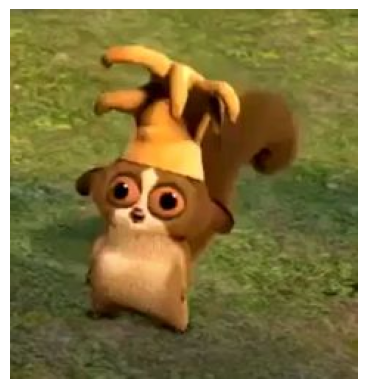

Generated Captions:
Caption 1: a close up of a stuffed animal on a grass field
Caption 2: the cat in the hat
Caption 3: [ unused0 ] the squirrel from the movie squirrel
Caption 4: a dog wearing a bear costume 

Press '1' to generate captions for an image
Press '2' to translate text
Press '3' to generate an image based on a user prompt
Type 'exit' to exit the program


Please input a number as your choice:  2

Bot: It seems you want to translate text.


Please share the text you would like to be translated:
 Pandas are charming, black-and-white bears native to the mountainous forests of China. Known for their gentle demeanor and distinctive markings, they primarily eat bamboo, consuming up to 40 pounds daily. Despite being solitary animals, pandas communicate through vocalizations and scent marking. Classified as vulnerable, conservation efforts have helped increase their population, making them a global symbol of wildlife preservation.

Please share the language you would want to translate it to:
 German

Bot: Translated text: Pandas sind charmant, schwarz-weiße Bären, die in den Bergwäldern Chinas beheimatet sind.Bekannt für ihr sanftes Auftreten und ihre charakteristischen Markierungen essen hauptsächlich Bambus und verbrauchen täglich bis zu 40 Pfund.Obwohl Pandas einsame Tiere sind, kommunizieren sie durch Vokalisationen und Geruchsmarkierungen.Die Erhaltungsbemühungen haben als verletzlich eingestuft und haben dazu beigetragen, ihre Bevölkerung zu erhöhen, was sie zu einem globalen Symbol für die Erhaltung der Wildtiere macht.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

The sentiment of the text from the user prompt is : POSITIVE
The sentiment score of the text from the user prompt is : 0.9992319345474243
The named entities in the text are : 
pandas ORG
china GPE
40 pounds QUANTITY
daily DATE
The named entities in the text are visualized below



Press '1' to generate captions for an image
Press '2' to translate text
Press '3' to generate an image based on a user prompt
Type 'exit' to exit the program


Please input a number as your choice:  3

Bot: Generating an image based on your prompt.


Please share the prompt based on which you would like an image to be generated.
You: A cat on top of  a mountain ruling the world

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

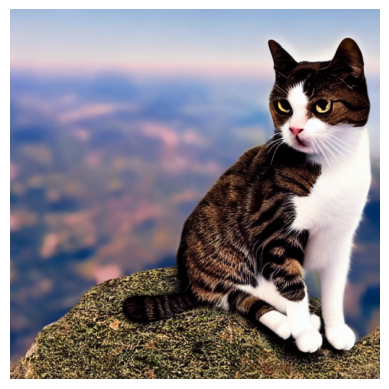

Bot: Image generated and displayed.
The sentiment of the text from the user prompt is : POSITIVE
The sentiment score of the text from the user prompt is : 0.9944792985916138
The named entities in the text are : 
The named entities in the text are visualized below



Press '1' to generate captions for an image
Press '2' to translate text
Press '3' to generate an image based on a user prompt
Type 'exit' to exit the program


Please input a number as your choice:  exit

Goodbye!


In [0]:
# Chatbot loop
def chatbot():
    print("Welcome to the GenAI Agent! Type 'exit' to quit.")

    while True:
        intent = user_options()
        # Handle user intent
        if intent == "image":
            print("Bot: It seems you would like captions to be generated for an image")
            user_input = input("Please share the link or the path to the image you would like captions for.\nYou:")
            img, captions = generating_captions(user_input)
            if isinstance(img, Image.Image):  # Check if it's a PIL Image object
            # Display the image using matplotlib
                plt.imshow(img)
                plt.axis('off')  # Turn off axes for better visualization
                plt.show()
            else:
                img.show()  # Display the generated image
            print("Generated Captions:")
            for i in range(len(captions)):
                print(f"Caption {i+1}: {captions[i]}")

        elif intent == "translation":
            print("Bot: It seems you want to translate text.")
            user_input = input("Please share the text you would like to be translated:\n")
            lang = input("Please share the language you would want to translate it to:\n")
            translated_text = translate_text(user_input,lang)
            print(f"Bot: Translated text: {translated_text}")
            # Sentiment classification
            sentiment = analyze_sentiments(user_input)

            # Named entity extraction
            entities = generate_named_entities(user_input)

        elif intent == "generate_image":
            print("Bot: Generating an image based on your prompt.")
            user_input = input("Please share the prompt based on which you would like an image to be generated.\nYou:")
            image = generate_image(user_input)
            if isinstance(image, Image.Image):  # Check if it's a PIL Image object
            # Display the image using matplotlib
                plt.imshow(image)
                plt.axis('off')  # Turn off axes for better visualization
                plt.show()
            else:
                image.show()  # Display the generated image
            print("Bot: Image generated and displayed.")
             # Sentiment classification
            sentiment = analyze_sentiments(user_input)

            # Named entity extraction
            try:
                entities = generate_named_entities(user_input)
            except Exception as e:
                print(f"There are no entities present in the user user prompt.")

        elif intent == "exit":
            print("Goodbye!")
            break

        else:
            print("Bot: Invalid input. Please input a number as your choice:")

# # Run the chatbot
if __name__ == "__main__":
    chatbot()
